In [52]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import time

In [53]:
def main():
    size = 30  # the size of the system
    for T in np.linspace(0.02, 5, 20):
        ising, magnetism = get_one_sample(sizeOfSample=size, temperature=T)
        print( "Temperature=",T,"   Magnetic moment=", magnetism,"   Total energy=",calculateAllEnergy(ising))
        print("\n")
        #plt.plot(T, magnetism, 'o')
        plt.plot(T, calculateAllEnergy(ising), 'o')
    plt.show()
    
def get_one_sample(sizeOfSample, temperature):
    newS = np.zeros((sizeOfSample, sizeOfSample))  # initialization
    magnetism = 0
    for i00 in range(100):
        newS = Metropolis(newS, temperature)
        magnetism = magnetism + abs(sum(sum(np.cos(newS))))/newS.shape[0]**2
    magnetism = magnetism/100
    return newS, magnetism

def Metropolis(S, T):  # S is the initial state, T is the temperature
    k = 1  # Boltzmann's constant
    for i in range(S.shape[0]):
        for j in range(S.shape[0]):
            newAngle = np.random.randint(-1, 1)*np.pi
            energyBefore = getEnergy(i=i, j=j, S=S, angle=None)  # find the energy in this lattice
            energyLater = getEnergy(i=i, j=j, S=S, angle=newAngle)  # find the energy in this lattice after changing to a new angle
            alpha = min(1.0, math.exp(-(energyLater - energyBefore)/(k * T)))  # accept rate(Boltzmann distribution)
            if random.uniform(0, 1) <= alpha:
                S[i, j] = newAngle   # accept the new state
            else:
                pass  # keep the last state
    return S

def getEnergy(i, j, S, angle=None):  # calculate the energy in the position(i,j), it's the summation of interaction energy of the near 4 points 
    width = S.shape[0]
    height = S.shape[1]
    top_i = i - 1 if i > 0 else width - 1  # periodic boundary conditions
    bottom_i = i + 1 if i < (width - 1) else 0
    left_j = j - 1 if j > 0 else height - 1
    right_j = j + 1 if j < (height - 1) else 0
    environment = [[top_i, j], [bottom_i, j], [i, left_j], [i, right_j]]
    energy = 0
    if angle == None:
        for num_i in range(4):
            energy += -np.cos(S[i, j] - S[environment[num_i][0], environment[num_i][1]])
    else:
        for num_i in range(4):
            energy += -np.cos(angle - S[environment[num_i][0], environment[num_i][1]])
    return energy


In [54]:
def calculateAllEnergy(S):  # calculate the total energy of the whole system
    energy = 0
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            energy += getEnergy(i, j, S)
    return energy/2  # repeat twice, so divided by 2

Temperature= 0.02    Magnetic moment= 1.0    Total energy= -1800.0


Temperature= 0.2821052631578948    Magnetic moment= 1.0    Total energy= -1800.0


Temperature= 0.5442105263157896    Magnetic moment= 1.0    Total energy= -1800.0


Temperature= 0.8063157894736843    Magnetic moment= 0.9999111111111111    Total energy= -1800.0


Temperature= 1.0684210526315792    Magnetic moment= 0.9990666666666675    Total energy= -1800.0


Temperature= 1.330526315789474    Magnetic moment= 0.994133333333334    Total energy= -1792.0


Temperature= 1.5926315789473686    Magnetic moment= 0.9812888888888885    Total energy= -1784.0


Temperature= 1.8547368421052635    Magnetic moment= 0.9541999999999998    Total energy= -1568.0


Temperature= 2.1168421052631583    Magnetic moment= 0.8981999999999998    Total energy= -1476.0


Temperature= 2.378947368421053    Magnetic moment= 0.7028888888888887    Total energy= -1068.0


Temperature= 2.641052631578948    Magnetic moment= 0.3487111111111112    Total ene

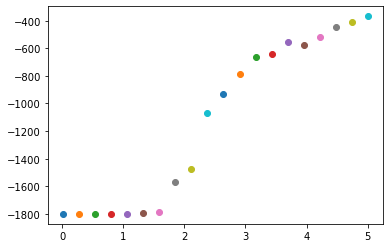

In [55]:
if __name__ == '__main__':
    main()